* This code generates a list of city names for us when provided with a list of coordinates.
* CitiPy is being utilized in the for loop to add cities for every pair of coordinates in our list.
* Students will be responsible for determining precisely how to do this in their homework assignment as well.
* [citipy documentation](https://github.com/wingchen/citipy)

In [26]:
# Dependencies
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from urllib.parse import quote
from citipy import citipy
import requests
import json
import os
import csv
from config import api_key_weather

In [27]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
cities_df = pd.read_csv('data/worldcities.csv')

In [28]:
positive_df = cities_df.loc[(cities_df.Latitude > 1)&(cities_df.Longitude > 1)]
positive_df.reset_index(drop=True,inplace=True)
few_df = positive_df.loc[positive_df.index < 560]

In [29]:
results = []

# Specify the file to write to
output_path = os.path.join(".", "data", "weatherlog.csv")

# Open the file using "write" mode. Add the header in this block
with open(output_path, 'w', newline='') as csvfile:
    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(['City', 'Country', 'Lat', 'Long', 'Cloudiness', 'Max Temperature', 'Humidity', 'Windspeed'])

for coord in few_df.itertuples(index=False):    
    
    city = citipy.nearest_city(coord[2], coord[3])
    cityname = city.city_name
    
    countryname = coord[0]
    lat = coord[2]
    long = coord[3]
    
    # Build query URL
    query_url = url + "appid=" + api_key_weather + "&q=" + quote(str(cityname))

    print(f"Processing city name '{cityname}' in country '{countryname}'.")
    print(query_url)
    
    try:
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        cloudiness = weather_json["clouds"]["all"]
        MaxTemp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        windspeed = weather_json["wind"]["speed"]

        # Open the file using "append" mode. Add the data in this block
        with open(output_path, 'a', newline='') as csvfile:
            # Initialize csv.writer
            csvwriter = csv.writer(csvfile, delimiter=',')

            # Write the data
            csvwriter.writerow([cityname, countryname, lat, long, cloudiness, MaxTemp, humidity, windspeed])

        city_data = {'City': [cityname], 'Lat': [lat], 'Lng': [long], 'Cloudiness': [cloudiness], 'Country': [countryname], 'Humidity': [humidity], 'Max Temperature': [MaxTemp], 'Windspeed': [windspeed]}
        df = pd.DataFrame(data=city_data)
        results.append(df) # append this loop's city data frame to the list of dataframes
    except (KeyError, IndexError):
        print("404 - City not found... skipping.")
        
    print("------------")

Processing city name 'andorra la vella' in country 'ad'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=andorra%20la%20vella
------------
Processing city name 'canillo' in country 'ad'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=canillo
------------
Processing city name 'encamp' in country 'ad'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=encamp
------------
Processing city name 'la massana' in country 'ad'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=la%20massana
------------
Processing city name 'les escaldes' in country 'ad'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=les%20escaldes
------------
Processing city name 'ordino' in country 'ad'.
http://api.openweathermap.org/data/2.5/weather?units=

------------
Processing city name 'orgun' in country 'af'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=orgun
404 - City not found... skipping.
------------
Processing city name 'pagman' in country 'af'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=pagman
404 - City not found... skipping.
------------
Processing city name 'panjab' in country 'af'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=panjab
------------
Processing city name 'qandahar' in country 'af'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=qandahar
404 - City not found... skipping.
------------
Processing city name 'qarchi gak' in country 'af'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=qarchi%20gak
------------
Processing city name 'q

404 - City not found... skipping.
------------
Processing city name 'klos' in country 'al'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=klos
------------
Processing city name 'konispol' in country 'al'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=konispol
------------
Processing city name 'koplik' in country 'al'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=koplik
------------
Processing city name 'korce' in country 'al'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=korce
------------
Processing city name 'kraste' in country 'al'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=kraste
404 - City not found... skipping.
------------
Processing city name 'kruje' in country 'al'.
http://api.openweathermap

------------
Processing city name 'aghavnadzor' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aghavnadzor
------------
Processing city name 'aghavnadzor' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aghavnadzor
------------
Processing city name 'aghavnatun' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aghavnatun
------------
Processing city name 'akhuryan' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=akhuryan
------------
Processing city name 'aknalich' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aknalich
------------
Processing city name 'aknashen' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units

------------
Processing city name 'aygek' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygek
------------
Processing city name 'aygepat' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygepat
------------
Processing city name 'aygeshat' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygeshat
------------
Processing city name 'aygeshat' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygeshat
------------
Processing city name 'aygestan' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygestan
------------
Processing city name 'aygezard' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a

------------
Processing city name 'gandzak' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=gandzak
------------
Processing city name 'garni' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=garni
------------
Processing city name 'gavar' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=gavar
------------
Processing city name 'gay' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=gay
------------
Processing city name 'geghamasar' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=geghamasar
------------
Processing city name 'geghamavan' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c96

------------
Processing city name 'lernakert' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lernakert
------------
Processing city name 'lernanist' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lernanist
------------
Processing city name 'spitak' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=spitak
------------
Processing city name 'lernapat' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lernapat
------------
Processing city name 'lernavan' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lernavan
------------
Processing city name 'lorut' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5

------------
Processing city name 'noyakert' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=noyakert
------------
Processing city name 'noyemberyan' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=noyemberyan
------------
Processing city name 'nshavan' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=nshavan
------------
Processing city name 'odzun' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=odzun
------------
Processing city name 'oshakan' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=oshakan
------------
Processing city name 'paravakar' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5

------------
Processing city name 'tsovagyugh' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=tsovagyugh
------------
Processing city name 'tsovak' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=tsovak
------------
Processing city name 'tsovazard' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=tsovazard
------------
Processing city name 'tsovinar' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=tsovinar
------------
Processing city name 'tumanyan' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=tumanyan
------------
Processing city name 'urut' in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e

------------
Processing city name 'amstetten' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=amstetten
------------
Processing city name 'anif' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=anif
------------
Processing city name 'ansfelden' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=ansfelden
------------
Processing city name 'arnoldstein' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=arnoldstein
------------
Processing city name 'asten' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=asten
------------
Processing city name 'axams' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378

------------
Processing city name 'fugen' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=fugen
------------
Processing city name 'furstenfeld' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=furstenfeld
------------
Processing city name 'gallneukirchen' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=gallneukirchen
------------
Processing city name 'ganserndorf' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=ganserndorf
------------
Processing city name 'garsten' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=garsten
------------
Processing city name 'gleisdorf' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?unit

------------
Processing city name 'krieglach' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=krieglach
------------
Processing city name 'kuchl' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=kuchl
------------
Processing city name 'kufstein' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=kufstein
------------
Processing city name 'laakirchen' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=laakirchen
------------
Processing city name 'laa' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=laa
------------
Processing city name 'landeck' in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1

In [30]:
city_data_pd = pd.concat(results) # Concat list of data frames in results from above to the final data frame
city_data_pd.head()
latdata = city_data_pd["Lat"]
tempdata = city_data_pd["Max Temperature"]
humidity = city_data_pd["Humidity"]
windspeed = city_data_pd["Windspeed"]
cloudiness = city_data_pd["Cloudiness"]

<IPython.core.display.Javascript object>


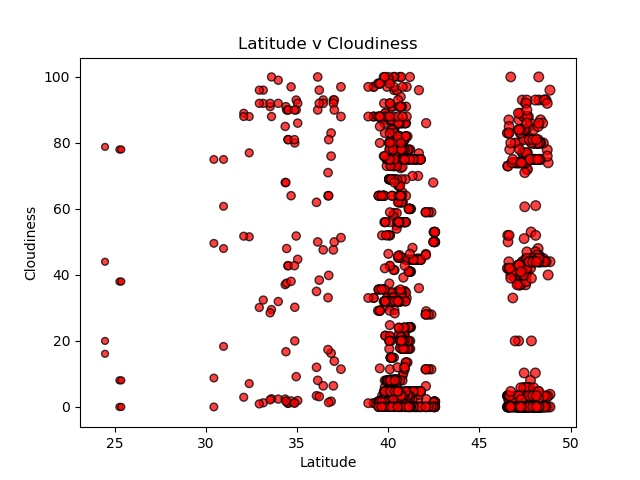

In [31]:
plt.scatter(latdata, tempdata, marker="o", facecolors="red", edgecolors="black",
            s=latdata, alpha=0.75)
# Create a title, x label, and y label for our chart
plt.title("Latitude v Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("LatTemp.png")
plt.show()

In [32]:
plt.scatter(latdata, humidity, marker="o", facecolors="red", edgecolors="black",
            s=latdata, alpha=0.75)
# Create a title, x label, and y label for our chart
plt.title("Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("LatHumidity.png")
plt.show()

In [33]:
plt.scatter(latdata, windspeed, marker="o", facecolors="red", edgecolors="black",
            s=latdata, alpha=0.75)
# Create a title, x label, and y label for our chart
plt.title("Latitude v Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")

plt.savefig("LatWindSpeed.png")
plt.show()

In [34]:
plt.scatter(latdata, cloudiness, marker="o", facecolors="red", edgecolors="black",
            s=latdata, alpha=0.75)
# Create a title, x label, and y label for our chart
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("LatCloudiness.png")
plt.show()

In [35]:
#random_data = np.arange(1,46000,50)
#random_data